<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_6823/NGC_6823.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [2]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files


## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
!pip install astroquery

     |████████████████████████████████| 4.5MB 45kB/s 
     |████████████████████████████████| 2.7MB 17.2MB/s 
  Created wheel for astroquery: filename=astroquery-0.4-cp36-none-any.whl size=3582510 sha256=12c3707ee782dcacf67d16b0693fddeaf9c2d38ca136113c5e676cbb65ebf9a1
  Stored in directory: /root/.cache/pip/wheels/a3/6d/9d/f6ceddc68de0e4b7a64b56d6e8c8075e6ef6377ec9c05ce128
Successfully built astroquery


In [4]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [5]:
## making a GAIA cone_search of 30m radius around NGC6823 center

coordinate = coord.SkyCoord.from_name('NGC6823')
print(coordinate)
radius = u.Quantity(0.5, u.deg)
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (295.7916, 23.3103)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [6]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: TableReplaceWarning: converted column 'priam_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: TableReplaceWarning: converted column 'flame_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,b'Gaia DR2 2020089386088397056',2020089386088397056,399304728,2015.5,295.791683,0.946932,23.308838,0.551730,-0.530218,0.803827,-0.659617,-1.216253,1.954353,-6.016135,1.196630,-0.030475,-0.217196,-0.687277,0.095352,0.164534,0.039936,-0.168595,0.119409,-0.203118,-0.071294,166,0,166,0,3.553847,232.708664,2.662887,3.613226e+00,31,False,0.034007,1.090439,0.171268,0.004317,...,300.419365,13.030014,23.055950,18.567600,2.161607,0,2.458664,0.873859,1.584805,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',59.411437,-0.142940,303.607158,43.785199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.001470
1,1635721458409799680,b'Gaia DR2 2020089390387386880',2020089390387386880,1311033541,2015.5,295.790435,0.540321,23.308166,0.547388,0.636032,0.770940,0.825009,-1.068386,1.118819,-5.978596,1.115098,-0.172059,-0.149895,-0.447657,0.104823,0.332967,0.177253,-0.012162,0.136398,0.000468,-0.039324,208,0,207,1,1.817037,240.018616,0.000000,0.000000e+00,31,False,0.039889,1.034282,0.152023,-0.000971,...,253.366415,8.468123,29.920019,18.752548,2.058084,0,2.408978,0.885141,1.523836,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',59.410285,-0.142281,303.605394,43.784821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.002395
2,1635721458409799680,b'Gaia DR2 2020089386084423680',2020089386084423680,1644193616,2015.5,295.788939,0.067394,23.310749,0.070494,0.865379,0.101542,8.522359,2.338206,0.143787,-0.644659,0.160599,-0.010252,0.001964,-0.407374,0.051799,0.130705,0.020869,-0.148978,0.073207,-0.326644,-0.168430,209,0,206,3,3.187526,271.107880,0.326279,3.049519e+00,31,False,2.343525,1.461472,0.019520,-0.026663,...,2952.408634,19.600296,150.630814,16.086479,1.325135,0,1.498791,0.657146,0.841644,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',59.411841,-0.139803,303.604404,43.787658,100001.0,4423.25,4320.000000,4577.680176,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,0.804392,0.751034,0.843302,0.22315,0.169301,0.276998,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.002489
3,1635721458409799680,b'Gaia DR2 2020089390394718976',2020089390394718976,491372209,2015.5,295.788805,5.332306,23.310393,2.225252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.632947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86,0,85,1,1.018420,92.847717,3.213925,1.450666e+00,3,False,0.016350,NaN,NaN,-0.115340,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',59.411471,-0.139874,303.604120,43.787343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.002574
4,1635721458409799680,b'Gaia DR2 2020089386084422

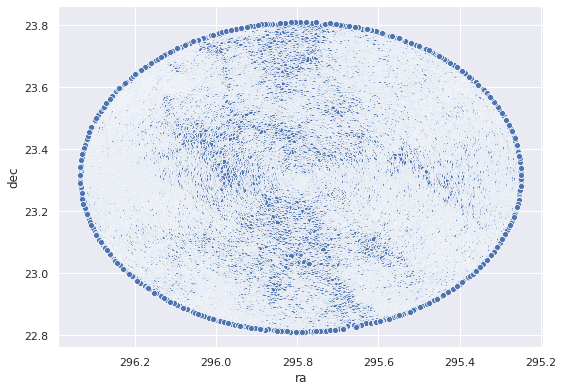

In [7]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(all_stars['ra'], all_stars['dec'])
skyplot.invert_xaxis()

#### Finding Cantat Data

In [8]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [9]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
catalogs

TableList with 2 tables:
	'0:J/A+A/633/A99/table1' with 20 column(s) and 1481 row(s) 
	'1:J/A+A/633/A99/members' with 13 column(s) and 435833 row(s) 

In [0]:
## saving the whole cantat table 
## comment out the next two line if you want to save the full cantat table

# cantat_all = catalogs['J/A+A/633/A99/members'].to_pandas()
# cantat_all.to_csv('cantat_all.csv')

In [0]:
# help(Vizier)

In [12]:
## saving only NGC 6823 data from Cantat

cantat_6823 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_6823")
cantat_6823 = cantat_6823[0].to_pandas()
cantat_6823

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,295.920964,23.216926,2020038086994047744,0.5395,-1.690,-6.012,NaN,12.571400,6.8707,0.2,b'NGC_6823',295.920972,23.216952
1,295.969964,23.253341,2020039671850991360,0.4589,-1.843,-5.034,NaN,15.561300,1.2442,0.4,b'NGC_6823',295.969973,23.253363
2,295.932955,23.239756,2020039603131544704,0.4530,-1.355,-5.335,NaN,15.595200,1.7401,0.7,b'NGC_6823',295.932961,23.239779
3,295.939990,23.173428,2020037644626451200,0.5261,-1.915,-5.115,NaN,16.928801,2.6232,0.4,b'NGC_6823',295.939998,23.173450
4,295.861400,23.128553,2020031249406016896,0.4379,-1.512,-5.757,NaN,16.452200,1.5907,0.4,b'NGC_6823',295.861408,23.128578
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,295.927210,23.411714,2020115125839583744,0.4833,-1.891,-5.302,NaN,14.713000,1.1106,0.9,b'NGC_6823',295.927219,23.411737
232,295.920987,23.412044,2020115125839588224,0.4233,-1.544,-5.404,NaN,13.826200,1.0384,1.0,b'NGC_6823',295.920994,23.412067
233,295.619401,23.405934,2020103439222069632,0.3885,-2.396,-5.511,NaN,17.872200,2.7512,0.3,b'NGC_6823',295.619412,23.405958
234,295.679190,23.468667,2020105505111917952,0.4928,-1.264,-5.499,NaN,15.276500,1.6758,0.6,b'NGC_6823',295.679196,23.468690


In [0]:
# renaming the cantat table to match it with gaia_data
cantat_6823 = cantat_6823.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [0]:
# taking the subset of only source_id and PMemb
cantat_6823 = cantat_6823.loc[:,['source_id', 'PMemb']]


In [0]:
# join the two table on source_id
cantat_6823 = all_stars.join(cantat_6823.set_index('source_id'), on='source_id')

In [16]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_6823 = cantat_6823.dropna(subset=['PMemb'])
cantat_6823

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb
4,1635721458409799680,b'Gaia DR2 2020089386084422272',2020089386084422272,1135429400,2015.5,295.789105,0.098773,23.307584,0.094117,0.310205,0.137585,2.254653,-1.684209,0.209923,-5.204354,0.193507,0.100118,0.037532,-0.363528,0.051668,0.307992,0.049551,-0.160496,0.006406,-0.198335,0.050836,195,0,194,1,2.237161,235.145248,0.288315,1.186962e+00,31,False,1.314007,1.351671,0.027284,-0.000650,...,15.322525,147.501419,16.376604,1.520078,1,2.463629,1.260351,1.203278,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',59.409171,-0.141510,303.603557,43.784549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.003562,0.8
16,1635721458409799680,b'Gaia DR2 2020089390394715392',2020089390394715392,1453067415,2015.5,295.798253,0.022301,23.307304,0.024767,0.385571,0.031191,12.361774,-1.708778,0.044956,-5.297839,0.045675,-0.050480,0.020786,-0.461609,0.069062,0.128717,0.053017,-0.365821,-0.108754,-0.234162,-0.094076,219,0,219,0,-3.373628,150.989471,0.000000,0.000000e+00,31,False,26.832626,1.489025,0.007092,-0.010677,...,58.532581,325.675781,14.061462,1.288295,1,1.375081,0.602923,0.772158,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',59.413109,-0.148937,303.614762,43.782263,100002.0,4904.692383,4571.222656,5353.702148,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,3.554827,2.983552,4.092392,6.588381,5.307180,7.869582,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.006802,1.0
28,1635721458409799680,b'Gaia DR2 2020089351728656128',2020089351728656128,1452914048,2015.5,295.788169,0.019596,23.303248,0.025712,0.459230,0.035402,12.971771,-1.854948,0.043845,-5.349403,0.051427,0.123633,0.167278,-0.266453,0.116163,0.426360,0.215330,0.116599,0.235713,-0.068915,0.042414,179,27,179,0,-2.850043,125.527428,0.000000,0.000000e+00,31,True,149.308304,1.585891,0.006151,0.015219,...,194.070505,437.288452,12.440101,1.249030,1,0.950497,0.369617,0.580880,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',59.404983,-0.142922,303.600962,43.780546,100002.0,5190.560059,4672.596680,5406.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,5.964928,5.498972,7.360665,23.268156,19.431890,27.104422,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.007732,0.9
31,1635721458409799680,b'Gaia DR2 2020089596553153920',2020089596553153920,1560668892,2015.5,295.785581,0.015643,23.316048,0.017258,0.394434,0.022775,17.318398,-1.691605,0.031856,-5.244593,0.032756,-0.029495,-0.006086,-0.426166,0.101357,0.237464,0.086768,-0.283911,-0.048724,-0.155546,-0.047702,236,0,236,0,-4.747071,142.767120,0.000000,6.611488e-16,31,False,87.192085,1.586518,0.004578,0.015901,...,51.479795,971.665466,13.014036,1.235818,0,0.931493,0.370136,0.561357,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',59.414903,-0.134492,303.602016,43

In [0]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_6823.to_csv('NGC_6823_cantat.csv')
# all_stars.to_csv('NGC_6823_Gaia_30m.csv')

files.download('NGC_6823_cantat.csv')
# files.download('NGC_6823_Gaia_30m.csv')

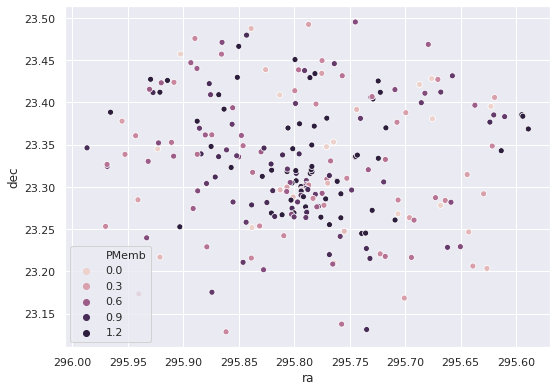

In [18]:
## plotting the skyplot 

skyplot = sns.scatterplot(cantat_6823['ra'], cantat_6823['dec'], hue = cantat_6823['PMemb'])
skyplot.invert_xaxis()

### Examining the Training Data

Separating the predictors (features) and the output (target, here PMemb) from the dataset and train the random forest model.

In [0]:
# import member dataset
member = cantat_6823

In [20]:
# Examining the descriptive statistics of each column
# (Notice BP-RP column has 9 less observation)
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb
count,2.360000e+02,2.360000e+02,2.360000e+02,236.0,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.0,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,...,235.000000,236.000000,2.350000e+02,235.000000,235.000000,235.000000,235.000000,236.000000,235.000000,235.000000,235.000000,0.0,0.0,236.0,0.0,0.0,0.0,236.000000,236.000000,236.000000,236.000000,173.000000,173.000000,173.000000,173.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,236.000000,236.000000
mean,1.635721e+18,2.020091e+18,8.937088e+08,2015.5,295.790720,0.042284,23.328696,0.047729,0.451142,0.064608,9.908674,-1.725432,0.087735,-5.284014,0.095143,-0.037774,-0.049781,-0.294415,0.073966,0.191826,0.043659,-0.267672,-0.092209,-0.158829,-0.056169,244.207627,20.991525,242.487288,1.720339,0.721530,295.265076,0.084882,1.729922,31.0,46.727886,1.454938,0.012588,-0.005530,27.902542,13.610169,...,16.323570,25.326271,4.715193e+04,111.269049,477.942444,14.652877,1.356632,0.173729,1.670694,0.788354,0.882340,NaN,NaN,0.0,NaN,NaN,NaN,59.428241,-0.132279,303.612574,43.804661,100059.121387,4615.184082,4430.080566,4918.141113,2.032288,1.728835,2.419694,1.015488,0.855196,1.217604,200111.0,4.828623,4.317303,5.223732,20.218658,17.528105,22.909195,0.093281,0.688983
std,0.000000e+00,1.262759e+13,4.716059e+08,0.0,0.084758,0.025780,0.074222,0.028202,0.071994,0.039134,5.520589,0.284471,0.054439,0.270415,0.058440,0.081573,0.089446,0.156099,0.071772,0.101236,0.084825,0.123620,0.130694,0.110848,0.100883,27.375313,67.694809,27.158868,2.831091,6.508442,595.619751,0.138637,12.353739,0.0,92.359978,0.097082,0.007801,0.046282,3.030875,0.950108,...,2.060002,4.166675,1.301781e+05,482.763556,393.314331,1.665210,0.118937,0.390728,0.638455,0.429119,0.230861,NaN,NaN,0.0,NaN,NaN,NaN,0.077206,0.074866,0.109081,0.073275,336.016892,630.935120,623.622559,619.761658,0.567328,0.565510,0.460402,0.288556,0.287885,0.235884,0.0,3.260908,2.935809,3.476829,43.775970,38.749149,48.813389,0.056289,0.285175
min,1.635721e+18,2.020031e+18,1.017820e+07,2015.5,295.589029,0.011649,23.128553,0.014271,0.276691,0.018766,1.733375,-2.541669,0.023894,-6.179777,0.026963,-0.371867,-0.356643,-0.713473,-0.144755,-0.286592,-0.223280,-0.711844,-0.357489,-0.696058,-0.460995,140.000000,0.000000,140.000000,0.000000,-8.513625,84.422424,0.000000,0.000000,31.0,0.803691,1.023783,0.003340,-0.116399,17.00

In [21]:
# correlation of PMemb with other variables
member.corr().PMemb.dropna().sort_values()

dec_error                         -0.495840
phot_bp_mean_mag                  -0.492780
parallax_error                    -0.492095
astrometric_pseudo_colour_error   -0.490209
pmdec_error                       -0.481015
                                     ...   
phot_g_mean_flux_over_error        0.357585
astrometric_pseudo_colour          0.378784
phot_bp_mean_flux_over_error       0.394841
parallax_over_error                0.473070
PMemb                              1.000000
Name: PMemb, Length: 83, dtype: float64

In [0]:
### adding their distance from the center of the clusters

## NGC 6823
center = coord.SkyCoord.from_name('NGC6823')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( (member['ra'] - center_ra)**2 + (member['dec'] - center_dec)**2 )
member['dist_6823_center'] = distance

In [0]:
# Choosing the predictors
# Usual Parameters

feature_columns = ['ra', 'dec', 'ra_error', 'dec_error', 
                   'parallax', 'parallax_error', 'parallax_over_error',
                   'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
                   'phot_g_mean_mag', 'bp_rp', 'dist_6823_center']

features = member.loc[:,feature_columns]
targets = member['PMemb']

In [24]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64 as the built-in radom forest package 
# don't take 64-bit-float
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,ra,dec,ra_error,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,bp_rp,dist_6823_center
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,295.790649,23.328909,0.042119,0.047647,0.451502,0.064433,9.936069,-1.725558,0.087228,-5.283184,0.094871,15.535210,1.670694,0.097723
std,0.084938,0.074302,0.025710,0.028234,0.071934,0.039125,5.516273,0.285072,0.053993,0.270691,0.058415,1.829103,0.638455,0.059108
min,295.589020,23.128553,0.011649,0.014271,0.276691,0.018766,1.733375,-2.541669,0.023894,-6.179777,0.026963,10.193748,0.568592,0.003688
25%,295.739746,23.278502,0.021391,0.024891,0.403761,0.032951,4.852901,-1.911925,0.043739,-5.444111,0.047873,14.244651,1.198522,0.043199
50%,295.790649,23.320467,0.030504,0.035504,0.445779,0.045592,8.998021,-1.710770,0.063274,-5.301626,0.068189,15.687202,1.618862,0.096678
75%,295.848755,23.385290,0.061494,0.070407,0.494105,0.096001,14.341465,-1.577446,0.128099,-5.133417,0.141272,17.208624,2.079470,0.148038
max,295.986664,23.495207,0.123066,0.132255,0.626909,0.180358,24.209372,-0.767657,0.261554,-4.431766,0.272089,17.981693,6.870721,0.210786


In [0]:
# Profile report of the full training_set
# pd_prof.ProfileReport(training_set)

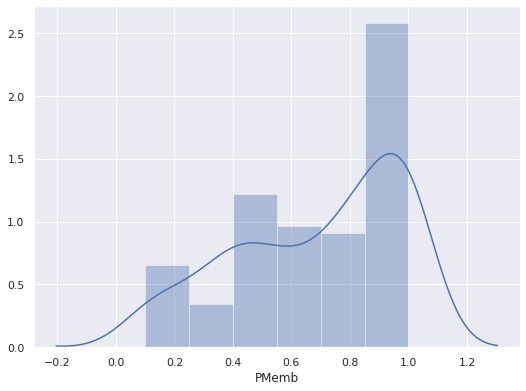

In [26]:
# histogram of PMemb in the training data
sns.distplot(training_set['PMemb'])
plt.show()

In [27]:
# Probable members (PMemb >= 0.5) in this dataset
len(training_set[training_set['PMemb'] >= 0.5])

176

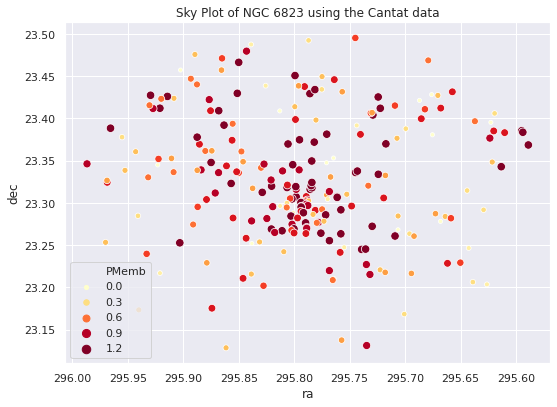

In [28]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
skyplot.invert_xaxis()
plt.title('Sky Plot of NGC 6823 using the Cantat data')
plt.show()

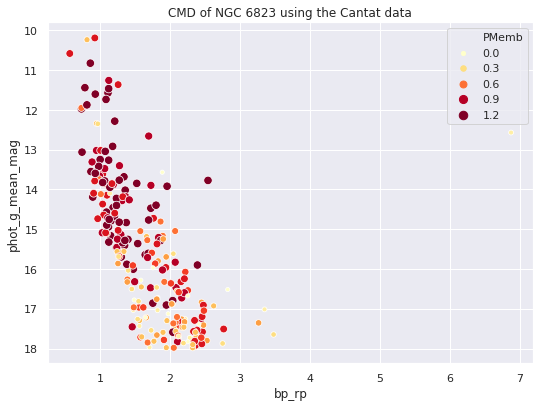

In [29]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
cmd.invert_yaxis()
plt.title('CMD of NGC 6823 using the Cantat data')
plt.show()

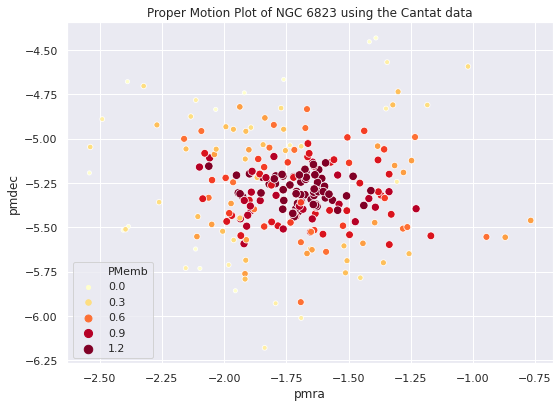

In [30]:
# proper motion plot marked with the membership probabilities of the stars 

pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
plt.title('Proper Motion Plot of NGC 6823 using the Cantat data')
plt.show()

In [31]:
# Use Random Forest on whole dataset using 100 different trees 
rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfr.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmdec                  0.424157
pmra                   0.144839
pmdec_error            0.109989
phot_g_mean_mag        0.099683
dist_6823_center       0.037218
dec_error              0.036550
parallax_error         0.026753
parallax               0.023518
parallax_over_error    0.020071
dec                    0.018405
bp_rp                  0.018166
pmra_error             0.016170
ra                     0.015210
ra_error               0.009271
dtype: float64

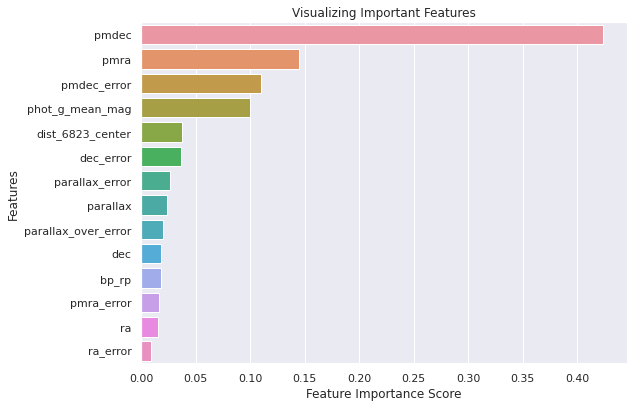

In [33]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Estimating the Model Accuracy in Test Data

In [0]:
# function for splitting a given dataset into training and test dataset

import random
# X = predictors, Y = target
def test_train_split(X, Y, test_ratio):
  ntest = int(len(X)*test_ratio) 
  ntrain = int(len(X) - ntest)

  # randomly select ntest number of rows from the full dataset as test_index and mark others as train_index.
  ind_test = random.sample(range(len(X)), k = ntest)
  ind_train = list(set(range(len(X))) - set(ind_test))

  # test and train dataset has the observations of test_indices and train_indices respectively
  test_X = X.iloc[ind_test]
  test_Y = Y.iloc[ind_test]

  train_X = X.iloc[ind_train]
  train_Y = Y.iloc[ind_train]

  return test_X, test_Y, train_X, train_Y

In [0]:
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
test_features, test_targets, train_features, train_targets = test_train_split(features, targets, 0.3)


In [36]:
# train the model using only training subset
rfr.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [37]:
# find the accuracy rate to predict the outcome for test subset
test_predict = rfr.predict(test_features)
rfr.score(test_features, test_targets)

0.7327253671424996

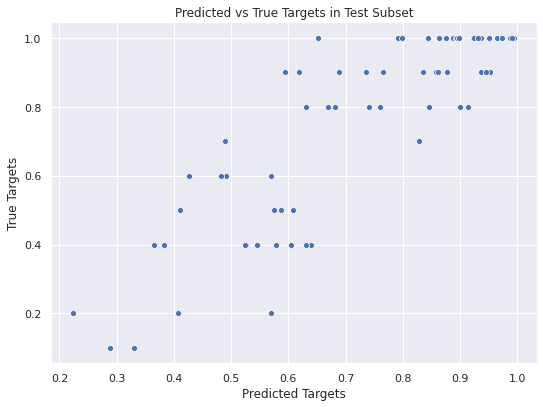

In [38]:
# plot Predicted vs True Targets in Test Subset

sns.scatterplot(test_predict, test_targets)
plt.title('Predicted vs True Targets in Test Subset')
plt.ylabel('True Targets')
plt.xlabel('Predicted Targets')
plt.show()

In [39]:
# Check with different test ratio

test_ratio = np.linspace(0.95, 0.05, 19)
print(test_ratio)

[0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35 0.3
 0.25 0.2  0.15 0.1  0.05]


In [40]:
# for each test_ratio, estimate the accuracy of the model

accuracy_rate = []

rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)

for ratio in test_ratio:
  
  accuracy = 0
  for iter in range(20):
    test_features, test_targets, train_features, train_targets = test_train_split(features, targets, ratio)

    # train the model using only training subset
    rfr.fit(train_features, train_targets)

    # find the accuracy rate to predict the outcome for test subset
    test_predict = rfr.predict(test_features)
    accuracy += rfr.score(test_features, test_targets)

  accuracy_rate.append(accuracy/20)

print(accuracy_rate)

[0.23680612781368066, 0.35577825800450597, 0.43565377330427985, 0.52565847491796, 0.5484846690667624, 0.6034348139715633, 0.6319894347258377, 0.6413348693591951, 0.6552607447413308, 0.6748951341302265, 0.6682950844041994, 0.6802267301889413, 0.7061290164264966, 0.7141687756504831, 0.7109475591586902, 0.7075269309060788, 0.7430200093204037, 0.7424113163440801, 0.7392350483267238]


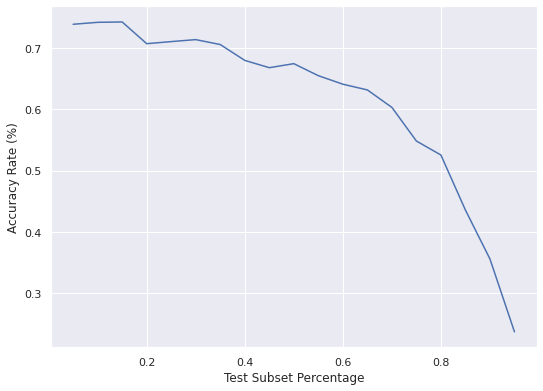

In [41]:
# plotting the accuracy rate vs test-ratio

sns.lineplot(test_ratio, accuracy_rate)
plt.xlabel('Test Subset Percentage')
plt.ylabel('Accuracy Rate (%)')
plt.show()

### Prediction of PMemb for the new stars

In [42]:
# descriptive stats
all_stars.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist
count,8.959800e+04,8.959800e+04,8.959800e+04,89598.0,89598.000000,89598.000000,89598.000000,89598.000000,75517.000000,75517.000000,75517.000000,75517.000000,75517.000000,75517.000000,75517.000000,89598.000000,75517.000000,75517.000000,75517.000000,75517.000000,75517.000000,75517.000000,75517.000000,75517.000000,75517.000000,89598.000000,89598.000000,89598.000000,89598.000000,89598.000000,8.959800e+04,89598.000000,89598.000000,89598.000000,89598.000000,75523.000000,75523.000000,89598.000000,89598.000000,89598.000000,...,73054.000000,73054.000000,89598.000000,7.314100e+04,73141.000000,73141.000000,73141.000000,73049.000000,89598.00000,73049.000000,73054.000000,73141.000000,290.000000,290.000000,89598.000000,290.000000,290.000000,290.000000,89598.000000,89598.000000,89598.000000,89598.000000,6835.000000,6835.000000,6835.000000,6835.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,4358.0,4358.000000,4358.000000,4358.000000,4358.000000,4358.000000,4358.000000,89598.000000
mean,1.635721e+18,2.020095e+18,8.454906e+08,2015.5,295.803970,0.939993,23.309065,1.183149,0.384877,0.667887,2.367709,-2.106540,0.867478,-5.069289,1.035740,0.067205,0.017912,-0.212015,0.045248,0.225919,0.009198,-0.220654,-0.123697,-0.037972,0.076655,213.934452,1.065705,212.524431,1.410020,4.104508,6.265756e+02,1.892681,15.013738,26.599589,1.993030,1.311471,0.125693,0.049424,24.586944,11.765006,...,35.527317,20.355598,18.926974,4.986629e+03,23.987743,102.217590,17.960375,1.901701,0.26399,2.396686,1.014975,1.382080,-8.371499,1.846729,0.026306,5135.344727,3.329310,-0.052586,59.417517,-0.152459,303.622402,43.782337,100663.774543,4271.917969,4072.799072,4581.461426,1.964656,1.736076,2.212698,0.996952,0.878290,1.123930,200111.0,2.593979,2.295902,2.809852,5.639139,4.884001,6.394289,0.363402
std,0.000000e+00,9.793567e+13,4.884592e+08,0.0,0.311700,2.305467,0.248661,2.409123,1.406789,0.570291,8.292514,3.269842,0.699573,4.371296,0.907276,0.220801,0.168015,0.163276,0.103854,0.160319,0.116139,0.152528,0.139446,0.152977,0.136898,75.573154,16.074846,75.256174,1.694683,11.950431,1.267190e+04,2.318076,413.011811,10.190635,17.835211,0.184010,0.099069,0.083201,8.459035,2.934567,...,103.152733,1.498901,10.979586,2.158658e+05,1359.892825,187.328857,1.398245,0.479422,0.63235,0.656137,0.590130,0.279453,28.533658,2.836720,0.487405,684.101318,0.503623,0.276756,0.258622,0.277285,0.393764,0.250908,3355.682796,530.797791,531.037842,564.955383,0.816203,0.858121,0.773977,0.417355,0.439455,0.396986,0.0,3.357165,2.983295,3.666721,43.996677,37.538849,50.504532,0.108807
min,1.635721e+18,2.019917e+18,6.724900e+04,2015.5,295.247614,0.010780,22.810446,0.012531,-38.863000,0

In [0]:
### adding their distance from the center of the clusters

## NGC 6823
center = coord.SkyCoord.from_name('NGC6823')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( (all_stars['ra'] - center_ra)**2 + (all_stars['dec'] - center_dec)**2 )
all_stars['dist_6823_center'] = distance

In [0]:
all_stars = all_stars.dropna(subset = feature_columns)

In [0]:
# select the set of predictor variables from the new dataset
new_features = all_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [46]:
# train the model again using all the features and targets of the previous dataset
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [47]:
# estimate the membership probability of the stars
all_stars['PMemb'] = rfr.predict(new_features)
sum(all_stars['PMemb'] >= 0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1460

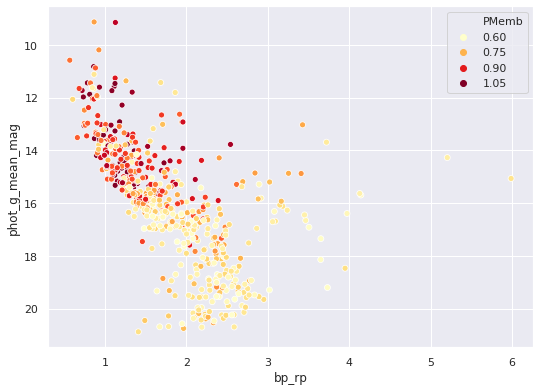

In [48]:
# CMD of probable members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.6] )
cmd.invert_yaxis()

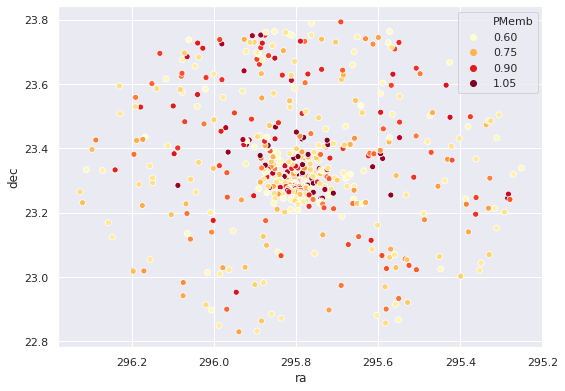

In [49]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.6] )
skyplot.invert_xaxis()

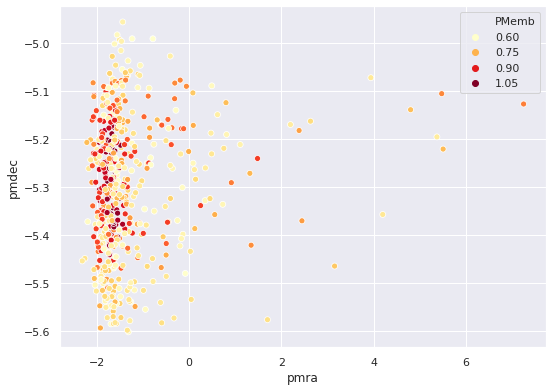

In [50]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.6] )

In [51]:
potentialMember = all_stars[all_stars['PMemb'] >= 0.6]
len(potentialMember)

539

In [52]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_6823_center,PMemb
count,5.390000e+02,5.390000e+02,5.390000e+02,539.0,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,5.390000e+02,539.0,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,5.390000e+02,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,8.000000,8.000000,539.000000,8.000000,8.000000,8.0,539.000000,539.000000,539.000000,539.000000,389.000000,389.000000,389.000000,389.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,308.0,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,539.000000,539.000000,539.000000
mean,1.635721e+18,2.020099e+18,8.483615e+08,2015.5,295.787231,0.099477,23.351459,0.110417,0.479687,0.149556,10.747050,-1.292206,0.207453,-5.297837,0.231955,-0.010262,-0.028376,-0.265991,0.047805,0.185136,0.018467,-0.249674,-0.117024,-0.130112,-0.022229,253.155844,18.955473,251.578850,1.576994,2.176169,391.326508,0.317778,5.182842e+00,31.0,40.359173,1.423467,0.029305,0.008058,28.899814,13.710575,...,26.152134,4.590490e+04,70.104782,486.327332,15.073170,1.466337,0.100186,1.807249,0.827904,0.979345,-1.679053,1.139627,0.115028,4875.000000,3.062500,0.0,59.446470,-0.118104,303.615925,43.827391,100129.668380,4555.764160,4367.020020,4863.088867,2.027846,1.745517,2.375540,1.023916,0.878450,1.207586,200111.0,4.050296,3.607285,4.376989,15.456124,13.497297,17.414930,0.215209,0.224068,0.763664
std,0.000000e+00,6.742216e+13,4.923331e+08,0.0,0.198223,0.163357,0.196386,0.191992,0.396125,0.249690,9.593072,1.057001,0.343442,0.140903,0.429221,0.097745,0.112175,0.145461,0.087962,0.109700,0.096613,0.113139,0.130427,0.111009,0.107188,33.509165,65.843722,33.443216,2.559171,9.252952,1168.372437,0.695140,4.511969e+01,0.0,87.835091,0.126810,0.048637,0.047547,3.723878,1.011872,...,4.765022,2.026180e+05,234.918872,415.607880,2.014758,0.326885,0.300526,0.686643,0.445569,0.324926,26.429918,1.044277,0.968719,744.023804,0.176777,0.0,0.199956,0.178067,0.259068,0.191728,1032.442732,639.472839,635.520874,647.528381,0.661767,0.677835,0.622550,0.338814,0.347855,0.315708,0.0,3.410647,3.114982,3.623199,47.965252,42.515392,53.421864,0.164354,0.171104,0.121308
min,1.635721e+18,2.019932e+18,1.672070e+05,2015.5,295.251096,0.011605,22.829943,0.013016,-1.904752,0.017369,-5.655668,-2.312831,0.023564,-5.600725,0.025143,-0.372375,-0.417156,-0.713473,-0.165256,-0.286592,-0.223280,-0.711844,-0.402745,-0.696058,-0.460995,126.000000,0.000000,126.00

In [53]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_6823_center
count,2.360000e+02,2.360000e+02,2.360000e+02,236.0,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.0,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,...,236.000000,2.350000e+02,235.000000,235.000000,235.000000,235.000000,236.000000,235.000000,235.000000,235.000000,0.0,0.0,236.0,0.0,0.0,0.0,236.000000,236.000000,236.000000,236.000000,173.000000,173.000000,173.000000,173.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,236.000000,236.000000,236.000000
mean,1.635721e+18,2.020091e+18,8.937088e+08,2015.5,295.790720,0.042284,23.328696,0.047729,0.451142,0.064608,9.908674,-1.725432,0.087735,-5.284014,0.095143,-0.037774,-0.049781,-0.294415,0.073966,0.191826,0.043659,-0.267672,-0.092209,-0.158829,-0.056169,244.207627,20.991525,242.487288,1.720339,0.721530,295.265076,0.084882,1.729922,31.0,46.727886,1.454938,0.012588,-0.005530,27.902542,13.610169,...,25.326271,4.715193e+04,111.269049,477.942444,14.652877,1.356632,0.173729,1.670694,0.788354,0.882340,NaN,NaN,0.0,NaN,NaN,NaN,59.428241,-0.132279,303.612574,43.804661,100059.121387,4615.184082,4430.080566,4918.141113,2.032288,1.728835,2.419694,1.015488,0.855196,1.217604,200111.0,4.828623,4.317303,5.223732,20.218658,17.528105,22.909195,0.093281,0.688983,0.097450
std,0.000000e+00,1.262759e+13,4.716059e+08,0.0,0.084758,0.025780,0.074222,0.028202,0.071994,0.039134,5.520589,0.284471,0.054439,0.270415,0.058440,0.081573,0.089446,0.156099,0.071772,0.101236,0.084825,0.123620,0.130694,0.110848,0.100883,27.375313,67.694809,27.158868,2.831091,6.508442,595.619751,0.138637,12.353739,0.0,92.359978,0.097082,0.007801,0.046282,3.030875,0.950108,...,4.166675,1.301781e+05,482.763556,393.314331,1.665210,0.118937,0.390728,0.638455,0.429119,0.230861,NaN,NaN,0.0,NaN,NaN,NaN,0.077206,0.074866,0.109081,0.073275,336.016892,630.935120,623.622559,619.761658,0.567328,0.565510,0.460402,0.288556,0.287885,0.235884,0.0,3.260908,2.935809,3.476829,43.775970,38.749149,48.813389,0.056289,0.285175,0.059130
min,1.635721e+18,2.020031e+18,1.017820e+07,2015.5,295.589029,0.011649,23.128553,0.014271,0.276691,0.018766,1.733375,-2.541669,0.023894,-6.179777,0.026963,-0.371867,-0.356643,-0.713473,-0.144755,-0.286592,-0.223280,-0.711844,-0.357489,-0.696058,-0.460995,140.000000,0.000000,140.000000,0.000000,-8.513625,84.422424,0.000000,0.000000,31.0,0.803691,1.023783,0.003340,-0.116399,17.000

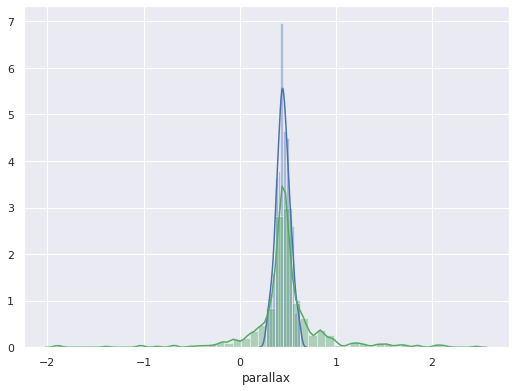

In [54]:
sns.distplot(member['parallax'], color = 'b')
sns.distplot(potentialMember['parallax'], color = 'g')

In [0]:
# saving the files as csv

# all_stars.to_csv('gaia_6823_membership_prob.csv')
potentialMember.to_csv('NGC_6823_membership_prob.csv')

In [0]:
files.download('NGC_6823_membership_prob.csv')

### Comparing the new and old probable members

In [0]:
# creating subset for the potential member in previous dataset

potential_Old_Member = member[member['PMemb'] >= 0.5]


concatenated = pd.concat([potentialMember.assign(dataset='New_member'), potential_Old_Member.assign(dataset='Old_member')])


In [66]:
concatenated.dataset.value_counts()

New_member    539
Old_member    177
Name: dataset, dtype: int64

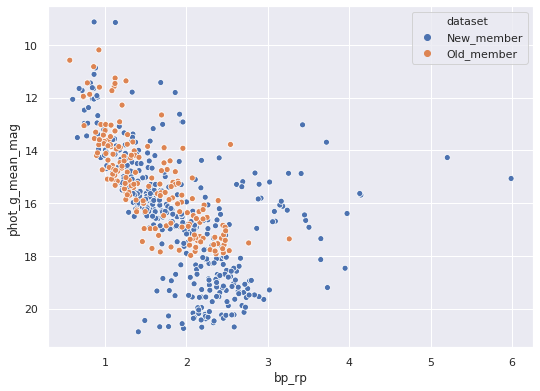

In [58]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

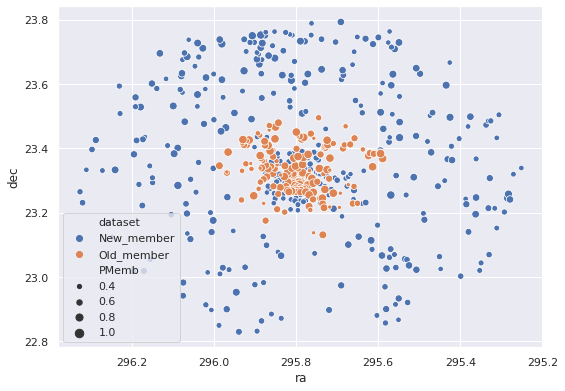

In [59]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='PMemb', hue='dataset')
skyplot.invert_xaxis()

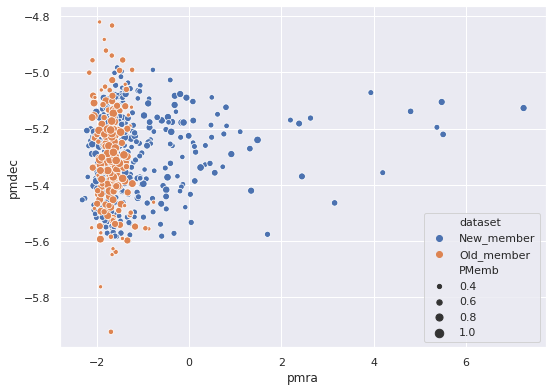

In [60]:
# proper motion plot

sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                size='PMemb', hue='dataset')

In [0]:
# pd_prof.ProfileReport(potentialMember)